In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown --id 1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QU_7IUsfpz19rx5Ud3efCE-rFdBgSEND
To: /content/sehirler - sehirler_saglikli.csv
100% 3.60k/3.60k [00:00<00:00, 5.68MB/s]


In [3]:
saglikk = pd.read_csv("sehirler - sehirler_saglikli.csv")

In [4]:
saglikk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    51 non-null     object 
 1   Rank                                    51 non-null     int64  
 2   Sunshine hours(City)                    51 non-null     int64  
 3   Cost of a bottle of water(City)         51 non-null     float64
 4   Obesity levels(Country)                 51 non-null     float64
 5   Life expectancy(years) (Country)        51 non-null     float64
 6   Pollution(Index score) (City)           51 non-null     float64
 7   Annual avg. hours worked                51 non-null     int64  
 8   Happiness levels(Country)               51 non-null     float64
 9   Outdoor activities(City)                51 non-null     int64  
 10  Number of take out places(City)         51 non-null     int64  


In [5]:
print(saglikk.shape)

(51, 12)


In [6]:
saglikk.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,2,2636,1.48,29.0,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,3,1884,1.94,20.1,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,4,1821,1.72,20.6,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,5,1630,2.19,19.7,79.8,21.24,1380,7.64,154,523,32.53


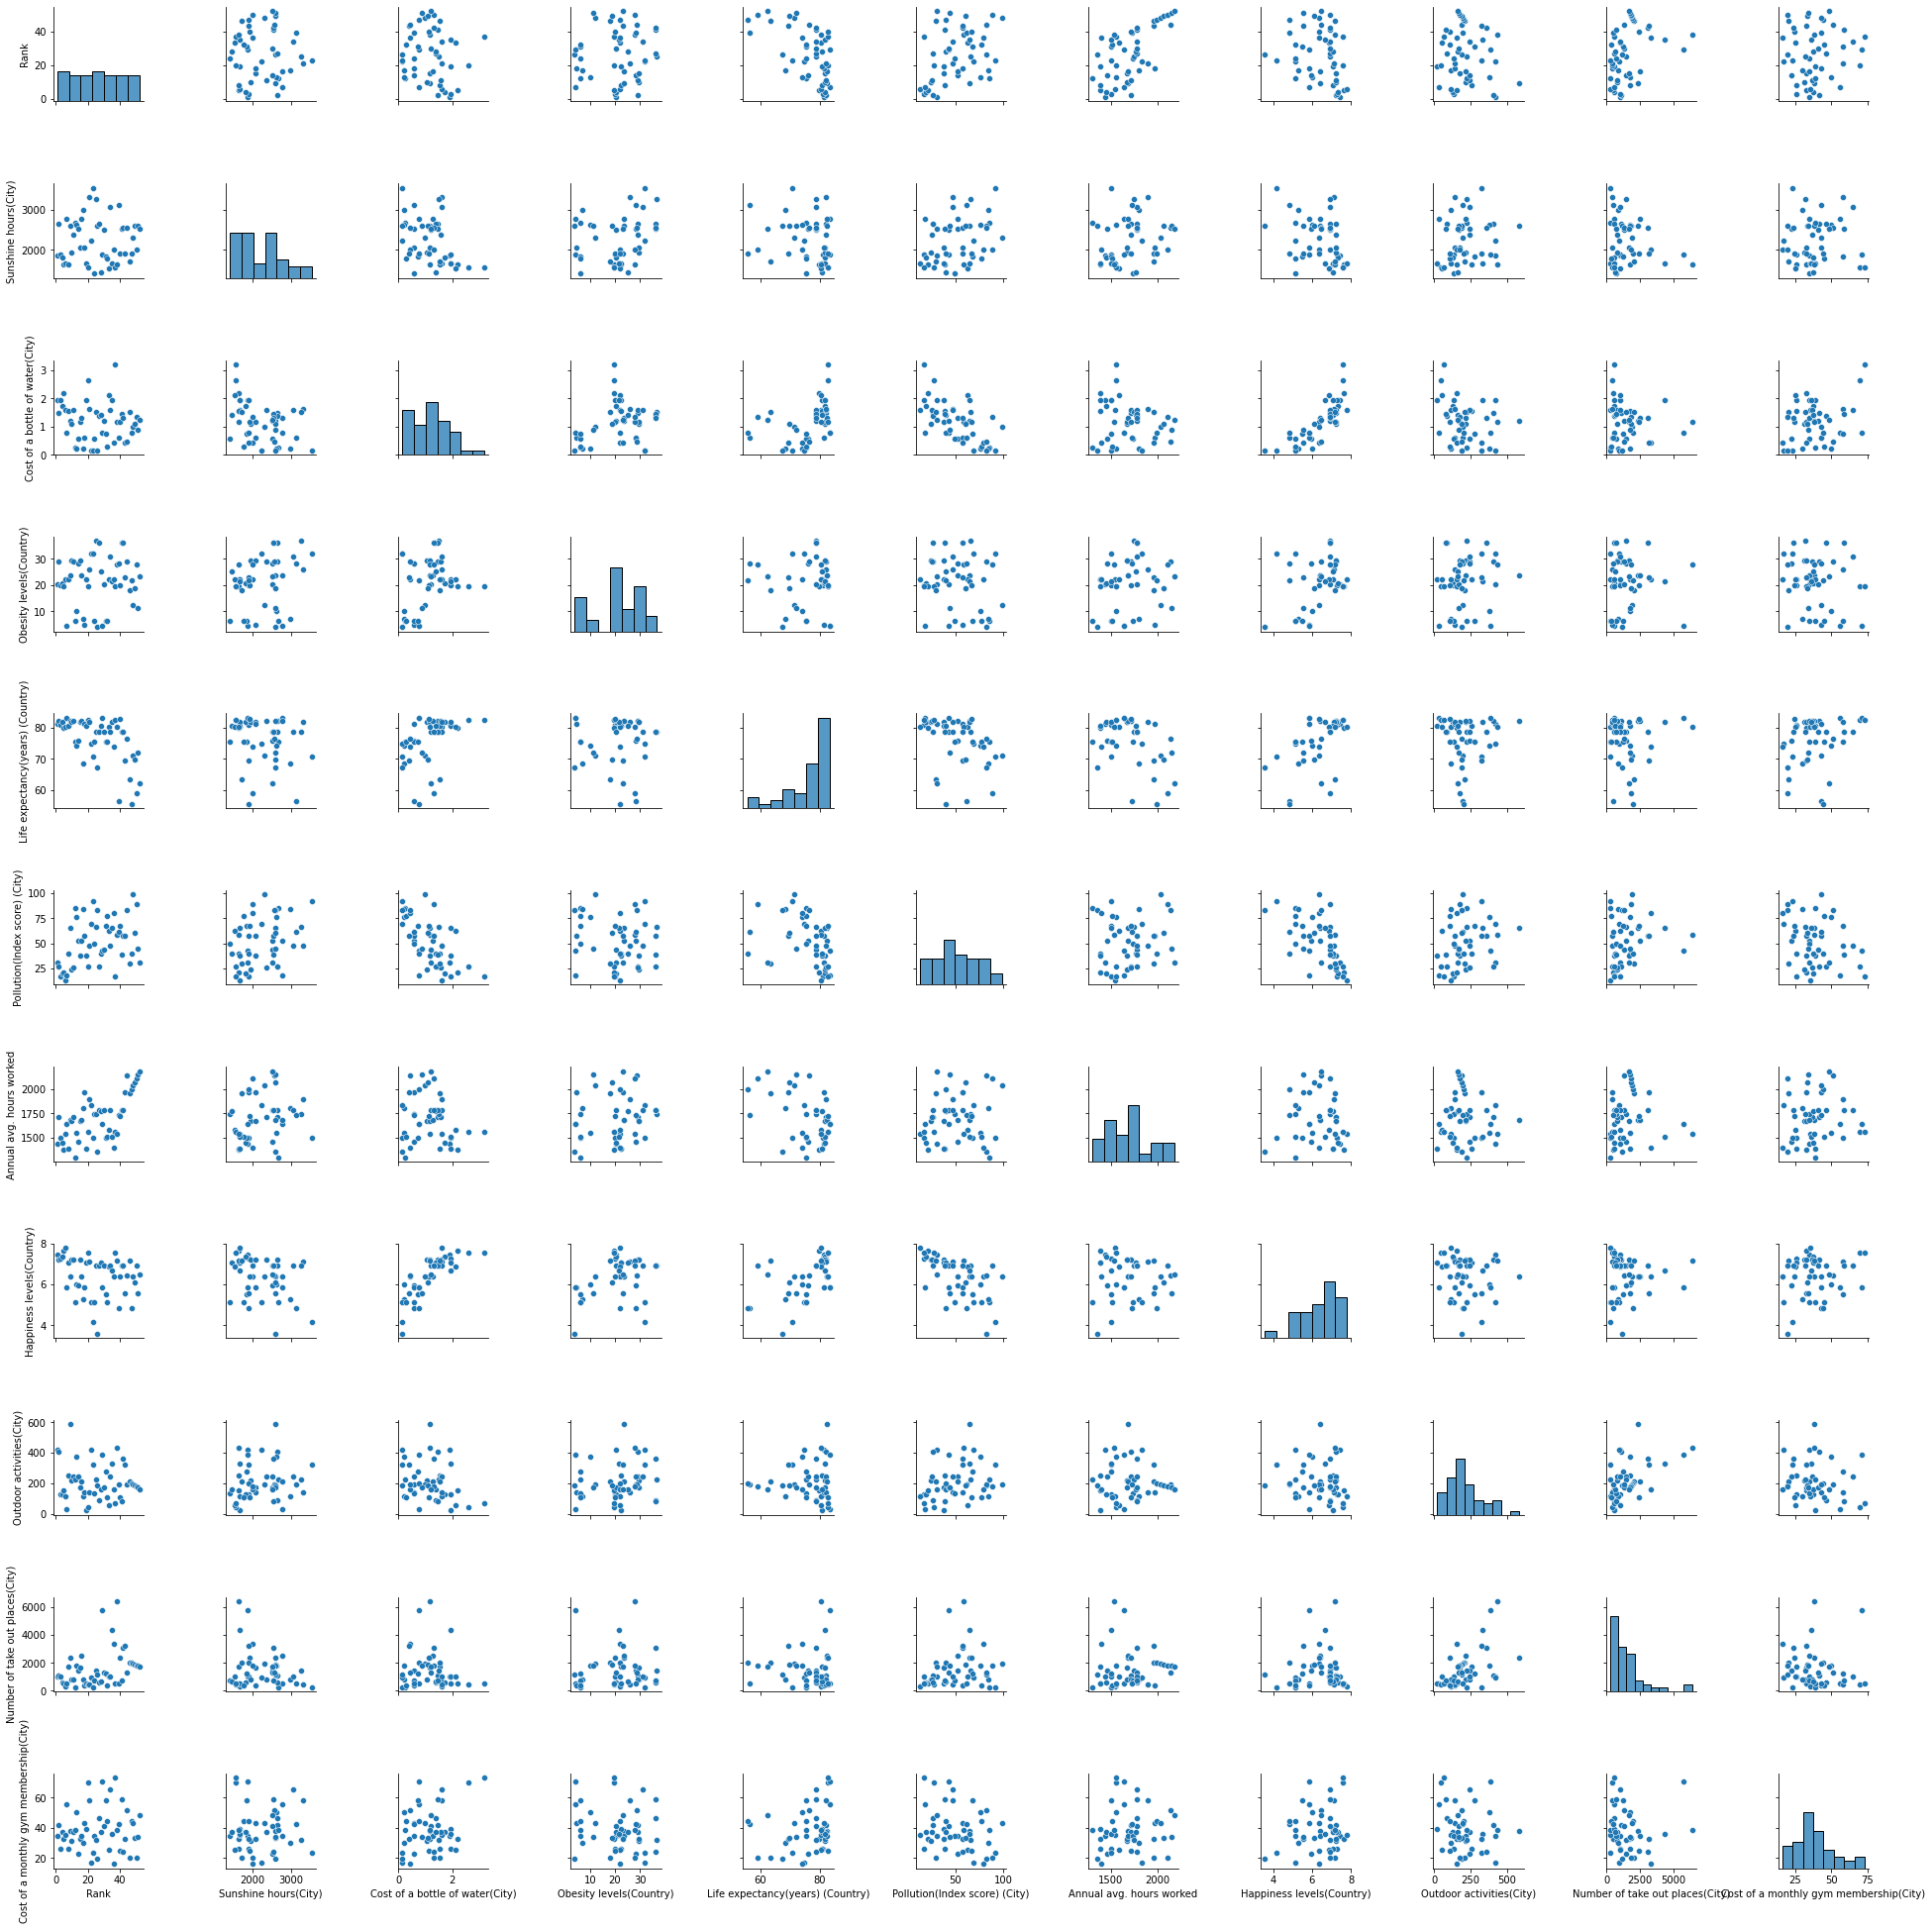

In [7]:
sns.pairplot(saglikk)

In [9]:
X = saglikk[["Obesity levels(Country)","Pollution(Index score) (City)","Annual avg. hours worked","Happiness levels(Country)","Pollution(Index score) (City)",]]
y = saglikk[["Life expectancy(years) (Country)"]]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 5)
(16, 5)
(35, 1)
(16, 1)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [14]:
print(model.coef_)
print(model.intercept_)

[[-0.27708455 -0.02371634 -0.00698637  5.37663674 -0.02371634]]
[61.95604375]


In [15]:
modelTahmin = model.predict([[20.40,30.93,1434,7.44,1]])
hesaplananFiyat = (20.40 * -0.27708455) + (30.93* -0.02371634) + (1434 * -0.00698637) + (7.44 * 5.37663674) + (1 * -0.02371634) + 61.95604375
print("modelin tahmini : ", modelTahmin)
print("hesaplanan  fiyat : ", hesaplananFiyat)

modelin tahmini :  [[85.52998035]]
hesaplanan  fiyat :  85.52997895940001


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
tahminler = model.predict(x_test)

In [17]:
tahmin_ve_sonuclar = pd.DataFrame({"gercek degerler" : y_test.values.reshape(-1,),"tahminler" : tahminler.reshape(-1,)})
tahmin_ve_sonuclar.head()

,gercek degerler,tahminler
0,70.70,60.550394
1,81.00,84.273778
2,71.91,71.596827
3,78.80,75.528586
4,78.80,75.974640


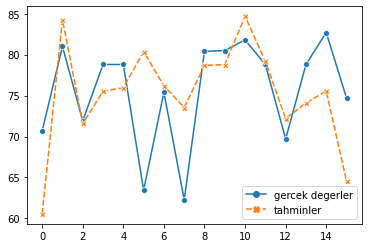

In [18]:
sns.lineplot(data=tahmin_ve_sonuclar,markers=True)

In [19]:
from sklearn import metrics
HataDegeri = metrics.mean_squared_error(y_test.values.reshape(-1,), tahminler.reshape(-1,))
print("ortalama kare hatası:" ,HataDegeri)


ortalama kare hatası: 46.42660346437741
